## EE521: DSP Lab
## Assignment 1
- Submitted By:
 - Sqn Ldr Monark Singh
 - 214102322
 - M.Tech (SPML)

## Continuous Time Signals
### Basic Signals

In [2]:
# Importing the Dependencies

from numpy import*
import numpy as np
import matplotlib.pyplot as plt
import math 

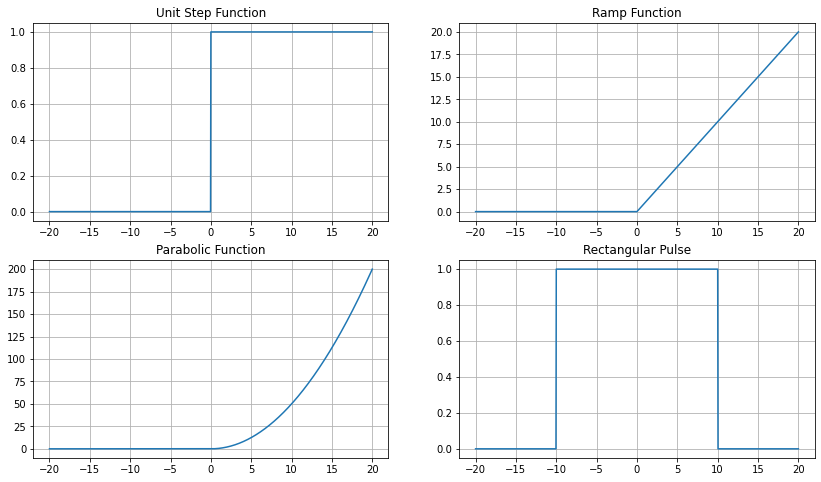

In [3]:
# Continuous-time Step, Ramp, Parabolic and Rectangular Signal

t = linspace(-20,20,1001)
N = len(t)

x1 = zeros(N)
x2 = zeros(N)
x3 = zeros(N)
x4 = zeros(N)

for i in range(N):
    if t[i] >= 0:
        x1[i] = 1                     # Defining Step function
        x2[i] = t[i]*x1[i]            # Defining Ramp function
        x3[i] = 0.5*t[i]*t[i]*x1[i]   # Defining Parabolic function
        

# Defining Rectangular pulse
for i in range(N):
    if t[i]>=-10 and t[i]<=10 :
        x4[i] = 1
        
# Plotting the functions
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
plt.plot(t,x1)
plt.grid(True)
plt.title('Unit Step Function')

plt.subplot(2,2,2)
plt.plot(t,x2)
plt.grid(True)
plt.title('Ramp Function')

plt.subplot(2,2,3)
plt.plot(t,x3)
plt.grid(True)
plt.title('Parabolic Function')

plt.subplot(2,2,4)
plt.plot(t,x4)
plt.grid(True)
plt.title('Rectangular Pulse')
plt.show()

In [4]:
'''
Defining the Convolution function
y = f*g
N1 = length of f, N2 = length of g
'''
def conv(f,g,N1,N2):
    y = [0] * (N1+N2-1)  # Declaring y as a zero array of length N1+N2-1
    for i in range(N1):
        for j in range(N2):
            y[i+j] += f[i]*g[j] 

    return y

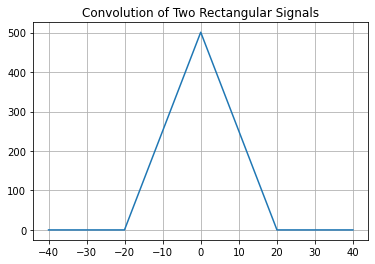

In [5]:
# Convolution of two Rectangular Pulses
x5 = conv(x4,x4,N,N)
t2 = linspace(-40,40,2*N-1)

plt.plot(t2,x5)
plt.grid(True)
plt.title('Convolution of Two Rectangular Signals')
plt.show()

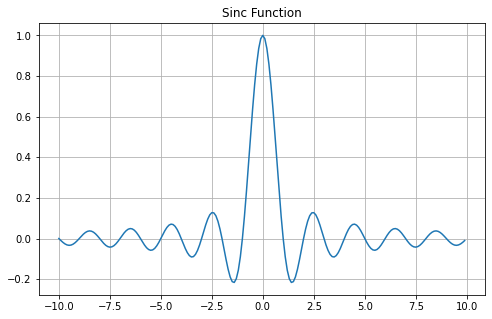

In [6]:
# Continuous time Sinc function

t3 = np.arange(-10,10,0.1)
N = len(t3)
x6 = zeros(N)

for i in range(N):
    x6[i] = sin(pi*t3[i])/(pi*t3[i])

plt.figure(figsize=(8,5))
plt.plot(t3,x6)
plt.grid(True)
plt.title('Sinc Function')
plt.show()

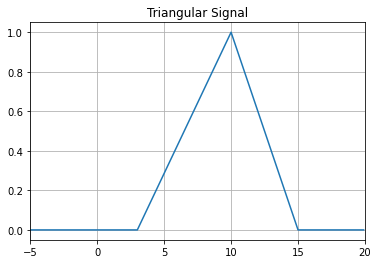

In [7]:
# Triangular Signal

t4 = np.arange(-20,20,0.1)
N = len(t4)
x7 = zeros(N)

for i in range(N):
    if t4[i]<0:
        x7[i] = 0
    elif t4[i]>=3 and t4[i]<=10 :
        x7[i] = (t4[i]-3)/7
    elif t4[i]>=10 and t4[i]<=15:
        x7[i] = (15-t4[i])/5
    else:
        x7[i] = 0
        
plt.plot(t4,x7)
plt.xlim(-5,20)
plt.title('Triangular Signal')
plt.grid(True)
plt.show()

### Plotting the Amplitude scaled and Time shifted versions of continuous-time signals

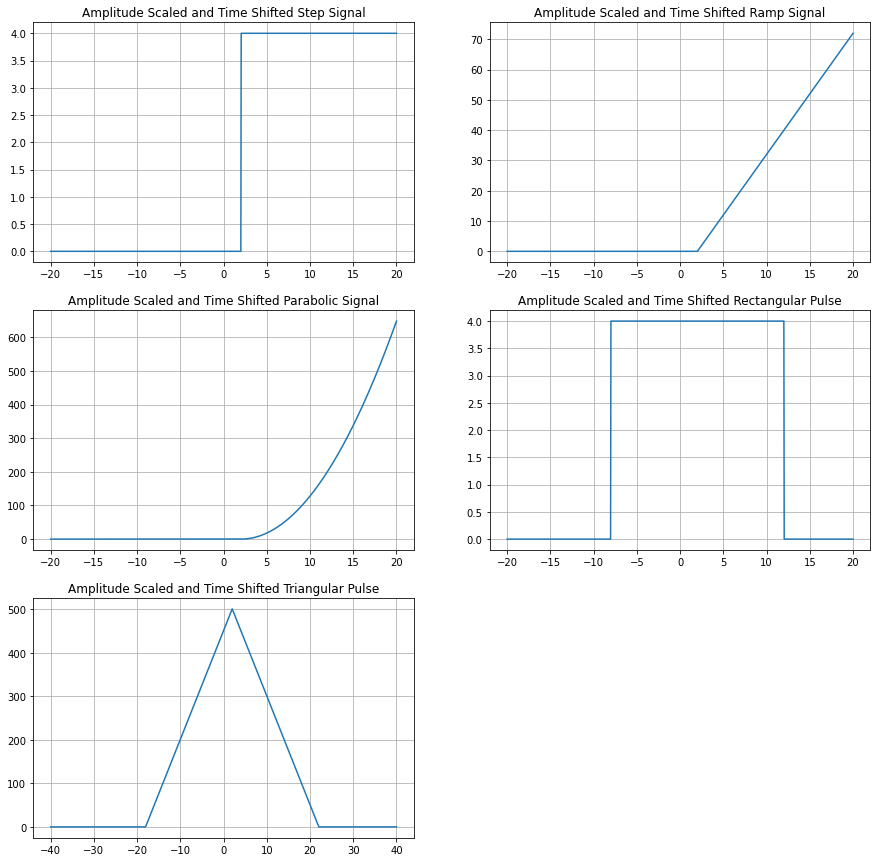

In [8]:
t = linspace(-20,20,1001)
N = len(t)

x1_ = zeros(N)
x2_ = zeros(N)
x3_ = zeros(N)
x4_ = zeros(N)
x5_ = zeros(2*N-1)

# Performing Amplitude scaling and time shifting
for i in range(N):
    if t[i]>2:
        x1_[i] = 4*x1[i]
        x2_[i] = 4*(t[i]-2)*x1[i]
        x3_[i] = 4*0.5*(t[i]-2)*(t[i]-2)*x1[i]
        
for i in range(N):
    if t[i]>=-8 and t[i]<=12 :
        x4_[i] = 4
    else:
        x4_[i] = 0
    
for i in range(2*N-1):
        x5_[i] = x5[i-50]

plt.figure(figsize=(15,15))
    
plt.subplot(3,2,1)
plt.plot(t,x1_)
plt.grid(True)
plt.title('Amplitude Scaled and Time Shifted Step Signal')

plt.subplot(3,2,2)
plt.plot(t,x2_)
plt.title('Amplitude Scaled and Time Shifted Ramp Signal')
plt.grid(True)

plt.subplot(3,2,3)
plt.plot(t,x3_)
plt.title('Amplitude Scaled and Time Shifted Parabolic Signal')
plt.grid(True)

plt.subplot(3,2,4)
plt.plot(t,x4_)
plt.title('Amplitude Scaled and Time Shifted Rectangular Pulse')
plt.grid(True)

plt.subplot(3,2,5)
plt.plot(t2,x5_)
plt.title('Amplitude Scaled and Time Shifted Triangular Pulse')
plt.grid(True)
plt.show()

### Plotting time scaled versions of Step, Ramp and Parabolic signal

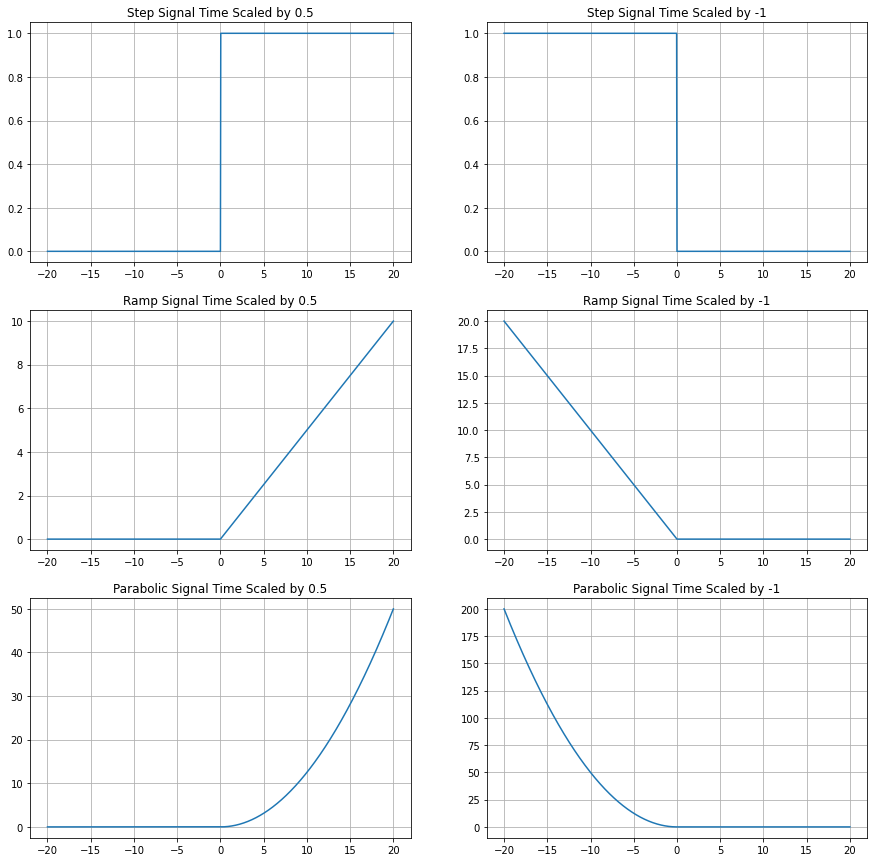

In [9]:
x1_t1 = zeros(N)
x2_t1 = zeros(N)
x3_t1 = zeros(N)

x1_t2 = zeros(N)
x2_t2 = zeros(N)
x3_t2 = zeros(N)

# perfroming time scaling
for i in range(N):
    if t[i]>0:
        x1_t1[i] = x1[i]
        x2_t1[i] = (t[i]*0.5)*x1[i]
        x3_t1[i] = 0.5*(t[i]*0.5)*(t[i]*0.5)*x1[i]
        
for i in range(N):
    if t[i]<0:
        x1_t2[i] = x1[N-i-1]
        x2_t2[i] = -1*(t[i])*x1[N-i-1]
        x3_t2[i] = 0.5*(t[i])*(t[i])*x1[N-i-1]
        
plt.figure(figsize=(15,15))
    
plt.subplot(3,2,1)
plt.plot(t,x1_t1)
plt.grid(True)
plt.title('Step Signal Time Scaled by 0.5')

plt.subplot(3,2,2)
plt.plot(t,x1_t2)
plt.grid(True)
plt.title('Step Signal Time Scaled by -1')

plt.subplot(3,2,3)
plt.plot(t,x2_t1)
plt.title('Ramp Signal Time Scaled by 0.5')
plt.grid(True)

plt.subplot(3,2,4)
plt.plot(t,x2_t2)
plt.title('Ramp Signal Time Scaled by -1')
plt.grid(True)

plt.subplot(3,2,5)
plt.plot(t,x3_t1)
plt.title('Parabolic Signal Time Scaled by 0.5')
plt.grid(True)

plt.subplot(3,2,6)
plt.plot(t,x3_t2)
plt.title('Parabolic Signal Time Scaled by -1')
plt.grid(True)
plt.show()

### Exponential Signals
### x(t) = A exp(−B t)

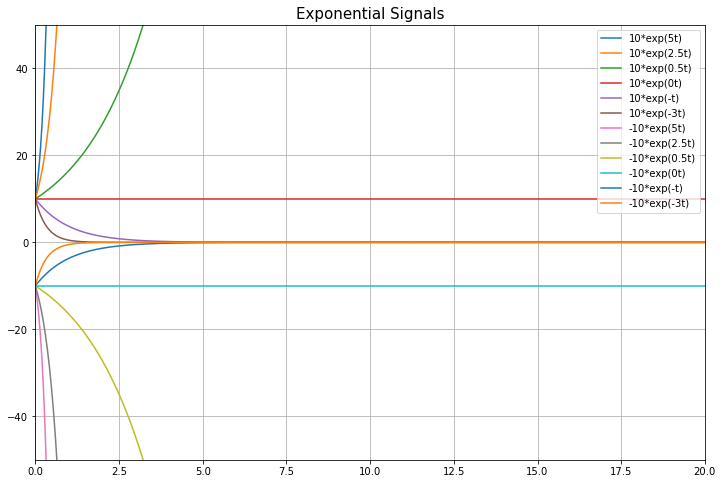

In [10]:
t = linspace(0,20,1000)
N = len(t)

# Amplitude
A1 = 10
A2 = -10

# Defining Exponential signals

x1_exp1 = A1* exp(5*t)
x1_exp2 = A1* exp(2.5*t)
x1_exp3 = A1* exp(0.5*t)
x1_exp4 = A1* exp(0*t)
x1_exp5 = A1* exp(-1*t)
x1_exp6 = A1* exp(-3*t)

x2_exp1 = A2* exp(5*t)
x2_exp2 = A2* exp(2.5*t)
x2_exp3 = A2* exp(0.5*t)
x2_exp4 = A2* exp(0*t)
x2_exp5 = A2* exp(-1*t)
x2_exp6 = A2* exp(-3*t)
    
plt.figure(figsize=(12,8))

plt.plot(t,x1_exp1,label='10*exp(5t)')
plt.plot(t,x1_exp2,label='10*exp(2.5t)')
plt.plot(t,x1_exp3,label='10*exp(0.5t)')
plt.plot(t,x1_exp4,label='10*exp(0t)')
plt.plot(t,x1_exp5,label='10*exp(-t)')
plt.plot(t,x1_exp6,label='10*exp(-3t)')

plt.plot(t,x2_exp1,label='-10*exp(5t)')
plt.plot(t,x2_exp2,label='-10*exp(2.5t)')
plt.plot(t,x2_exp3,label='-10*exp(0.5t)')
plt.plot(t,x2_exp4,label='-10*exp(0t)')
plt.plot(t,x2_exp5,label='-10*exp(-t)')
plt.plot(t,x2_exp6,label='-10*exp(-3t)')

plt.title('Exponential Signals',size='15')
plt.legend()
plt.xlim(0,20)
plt.ylim(-50,50)
plt.grid(True)
plt.show()

### Complex Exponential Signals
### y(t) = α exp(−βt) cos(ω t + φ)

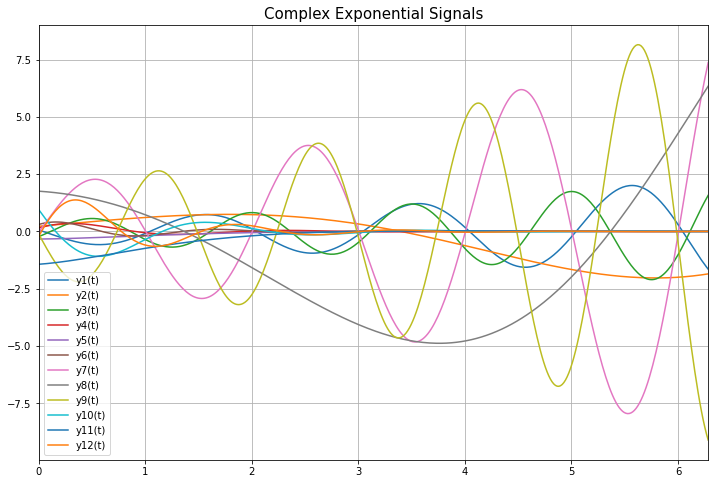

In [11]:
t = linspace(0, 2*pi, 400)

A1=0.5
A2=-2
B1=-0.25
B2=1
W1=pi
W2=pi/4
W3=4*pi/3

y1 = A1*exp(-B1*t)*cos(W1*t+(np.random.uniform(-pi,pi,1)))
y2 = A1*exp(-B1*t)*cos(W2*t+(np.random.uniform(-pi,pi,1)))
y3 = A1*exp(-B1*t)*cos(W3*t+(np.random.uniform(-pi,pi,1)))

y4 = A1*exp(-B2*t)*cos(W1*t+(np.random.uniform(-pi,pi,1)))
y5 = A1*exp(-B2*t)*cos(W2*t+(np.random.uniform(-pi,pi,1)))
y6 = A1*exp(-B2*t)*cos(W3*t+(np.random.uniform(-pi,pi,1)))

y7 = A2*exp(-B1*t)*cos(W1*t+(np.random.uniform(-pi,pi,1)))
y8 = A2*exp(-B1*t)*cos(W2*t+(np.random.uniform(-pi,pi,1)))
y9 = A2*exp(-B1*t)*cos(W3*t+(np.random.uniform(-pi,pi,1)))

y10 = A2*exp(-B2*t)*cos(W1*t+(np.random.uniform(-pi,pi,1)))
y11 = A2*exp(-B2*t)*cos(W2*t+(np.random.uniform(-pi,pi,1)))
y12 = A2*exp(-B2*t)*cos(W3*t+(np.random.uniform(-pi,pi,1)))

plt.figure(figsize=(12,8))

plt.plot(t, y1,label='y1(t)') 
plt.plot(t, y2,label='y2(t)')
plt.plot(t, y3,label='y3(t)')
plt.plot(t, y4,label='y4(t)')
plt.plot(t, y5,label='y5(t)')
plt.plot(t, y6,label='y6(t)')
plt.plot(t, y7,label='y7(t)')
plt.plot(t, y8,label='y8(t)')
plt.plot(t, y9,label='y9(t)')
plt.plot(t, y10,label='y10(t)')
plt.plot(t, y11,label='y11(t)')
plt.plot(t, y12,label='y12(t)')

plt.title('Complex Exponential Signals',size='15')
plt.xlim(0,2*pi)
plt.grid(True)
plt.legend()
plt.show()

### Plotting Real part, Imaginary part, Magnitude and Angle of Complex Exponential signals

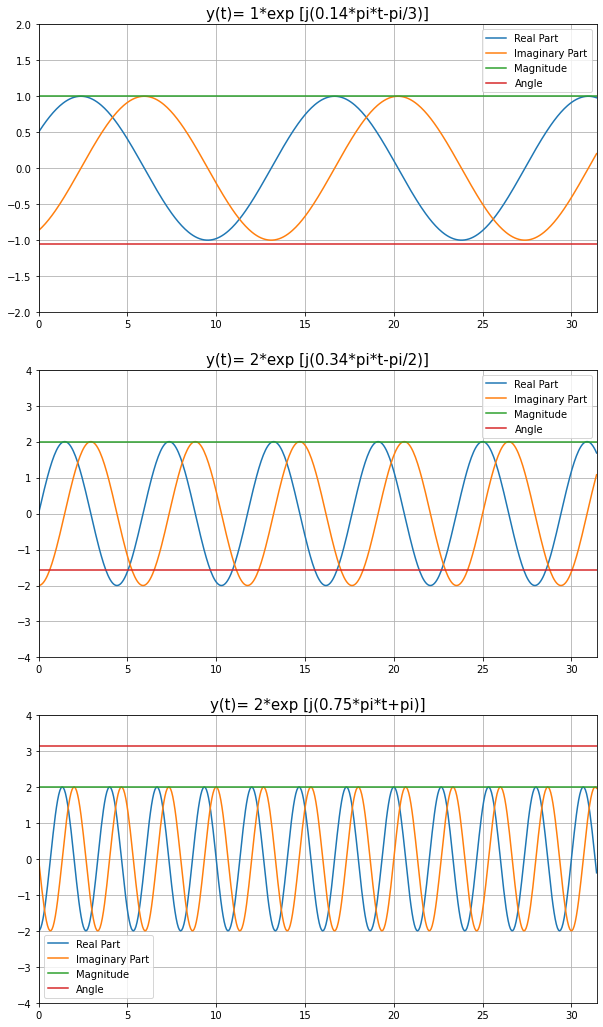

In [12]:
t = linspace(0, 10*pi, 500)
N = len(t)

A=[1,2,2]
W=[0.14*pi,0.34*pi,0.75*pi]
phi=[-pi/3,-pi/2,pi]

y0_real = A[0]*cos(W[0]*t+phi[0])  # Real Part
y0_img = A[0]*sin(W[0]*t+phi[0])   # Imaginary Part
y0_abs = zeros(N)                  
y0_angle = zeros(N)

for i in range(N):
    y0_abs[i] = A[0]            # Magnitude
    y0_angle[i] = phi[0]        # Angle

y1_real = A[1]*cos(W[1]*t+phi[1])
y1_img = A[1]*sin(W[1]*t+phi[1])
y1_abs = zeros(N)
y1_angle = zeros(N)

for i in range(len(t)):
    y1_abs[i] = A[1]
    y1_angle[i] = phi[1]

y2_real = A[2]*cos(W[2]*t+phi[2])
y2_img = A[2]*sin(W[2]*t+phi[2])
y2_abs = zeros(N)
y2_angle = zeros(N)

for i in range(len(t)):
    y2_abs[i] = A[2]
    y2_angle[i] = phi[2]

plt.figure(figsize=(10,18))

plt.subplot(3,1,1)
plt.plot(t,y0_real,label='Real Part')
plt.plot(t,y0_img,label='Imaginary Part')
plt.plot(t,y0_abs,label='Magnitude')
plt.plot(t,y0_angle,label='Angle')

plt.legend()
plt.xlim(0,10*pi)
plt.ylim(-2,2)
plt.grid(True)
plt.title('y(t)= 1*exp [j(0.14*pi*t-pi/3)]',size='15')

plt.subplot(3,1,2)
plt.plot(t,y1_real,label='Real Part')
plt.plot(t,y1_img,label='Imaginary Part')
plt.plot(t,y1_abs,label='Magnitude')
plt.plot(t,y1_angle,label='Angle')

plt.legend()
plt.xlim(0,10*pi)
plt.ylim(-4,4)
plt.grid(True)
plt.title('y(t)= 2*exp [j(0.34*pi*t-pi/2)]',size='15')

plt.subplot(3,1,3)
plt.plot(t,y2_real,label='Real Part')
plt.plot(t,y2_img,label='Imaginary Part')
plt.plot(t,y2_abs,label='Magnitude')
plt.plot(t,y2_angle,label='Angle')

plt.legend()
plt.xlim(0,10*pi)
plt.ylim(-4,4)
plt.grid(True)
plt.title('y(t)= 2*exp [j(0.75*pi*t+pi)]',size='15')
plt.show()

### Sinusoidal Signals

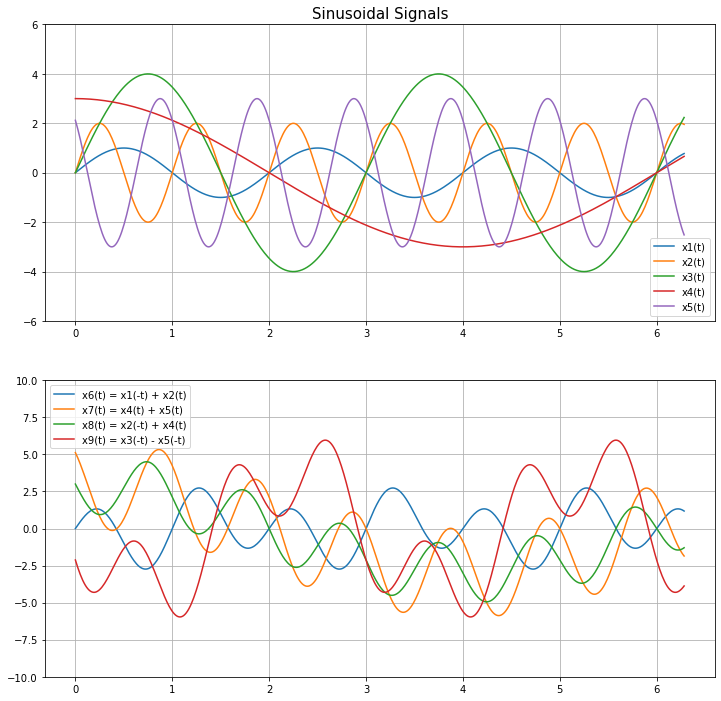

In [13]:
t = linspace(0, 2*pi, 500)

x1 = sin(pi*t)
x2 = 2*sin(2*pi*t)
x3 = 4*sin((2*pi/3)*t)
x4 = 3*cos((pi/4)*t)
x5 = 3*cos(2*pi*t + pi/4)

x6 = -x1 + x2
x7 = x4 + x5
x8 = -x2 + x4
x9 = -x3 - 3*cos(-2*pi*t + pi/4)

plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
plt.plot(t,x1,label='x1(t)')
plt.plot(t,x2,label='x2(t)')
plt.plot(t,x3,label='x3(t)')
plt.plot(t,x4,label='x4(t)')
plt.plot(t,x5,label='x5(t)')

plt.title('Sinusoidal Signals',size='15')
plt.legend()
plt.ylim(-6,6)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(t,x6,label='x6(t) = x1(-t) + x2(t)')
plt.plot(t,x7,label='x7(t) = x4(t) + x5(t)')
plt.plot(t,x8,label='x8(t) = x2(-t) + x4(t)')
plt.plot(t,x9,label='x9(t) = x3(-t) - x5(-t)')

plt.legend()
plt.ylim(-10,10)
plt.grid(True)
plt.show()

### Power and Energy of Signals

In [28]:
from sympy import*
import sympy as sp

A,B,t,T,w= symbols('A,B,t,T,w')
init_printing(pretty_print=True)

### Sinusoidal Signal
### x(t) = A * sin(w*t)

Energy of Sinusoidal signal is given by


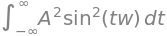

In [30]:
print("Energy of Sinusoidal signal is given by")
Integral((A**2 * sp.sin(w*t)**2),(t,-oo,oo))

In [47]:
A1= 10    # Amplitude of the sinusoidal signal
w1 = sp.pi # Angular frequency of the sinusoidal signal

Energy = integrate((A1**2 * sp.sin(w1*t)**2),(t,-oo,oo))
print(f'Energy of the Sinusoidal signal = {Energy}')

Power = limit(integrate((A**2 * sp.sin(t)**2)/T,(t,-T/2,T/2)),T,oo)
display(f'Power of the Sinusidal signal Watts',Power)

Energy of the Sinusoidal signal = oo


'Power of the Sinusidal signal Watts'

### Exponential Signal
### x(t) = A * exp(-B*t)

Energy of a right sided Exponential signal is given by


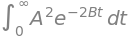

In [39]:
# Defining Exponential signal
x = A * E**(-B*t)

print('Energy of a right sided Exponential signal is given by')
Integral(x**2,(t,0,oo))

In [42]:
A1 = 1
B1 = 2
x = A1 * E**(-B1*t)

y =integrate(x**2,(t,0,oo))
E2 = y
print(f'Energy of the right sided exponential signal= {E2} J')

z = limit((1/(2*T))*integrate(x**2,(t,0,oo)),T,oo)
P2 = z
display(f'Power of the right sided exponential signal= {P2} W')


Energy of the right sided exponential signal= 1/4 J


'Power of the right sided exponential signal= 0 W'

### Complex Exponential Signal
### x(t) = A * exp( j (ωt+φ))

Energy of Complex exponential signal is given by


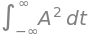

In [34]:
print("Energy of Complex exponential signal is given by")
Integral((A**2),(t,-oo,oo))


In [35]:
A1= 10    # Amplitude of the complex exponential signal

Energy = integrate((A1**2),(t,-oo,oo))
print(f'Energy of the complex exponential signal = {Energy}')

Power = limit(integrate((A**2)/T,(t,-T/2,T/2)),T,oo)
print(f'Power of the complex exponential signal = {Power} Watts')

Energy of the complex exponential signal = oo
Power of the complex exponential signal = A**2 Watts


## Discrete Time Signals

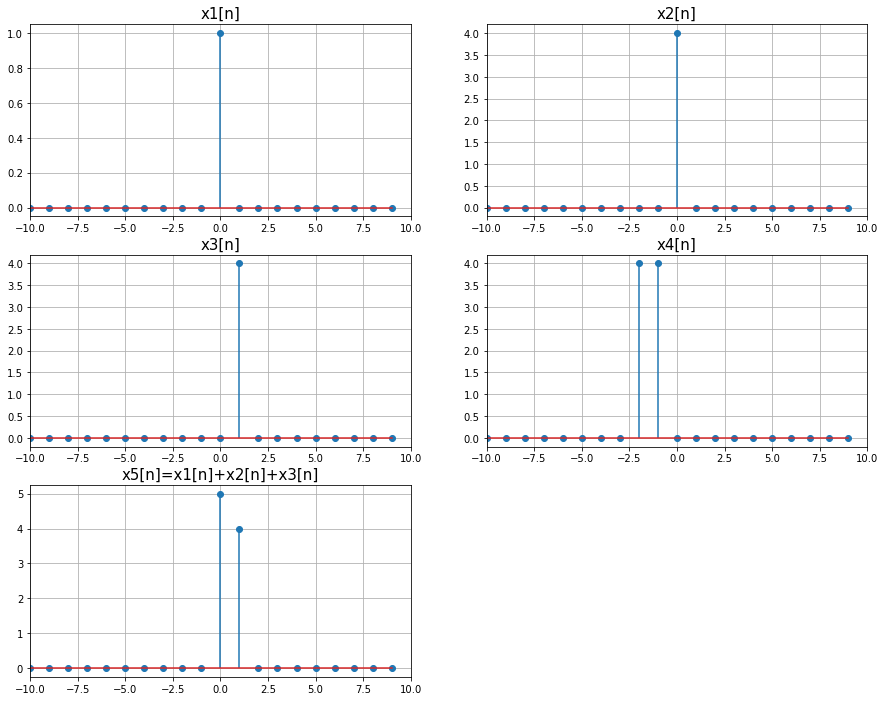

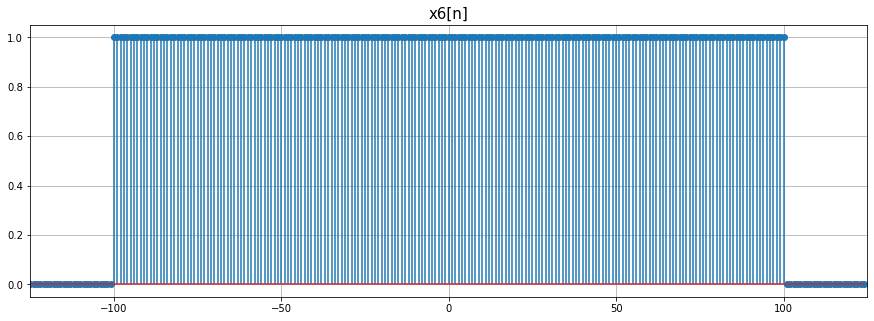

In [15]:
# Defining an Impulse function
def impulse(x):
    return 1 * (x == 0)

t = np.arange(-10,10,1)

x1 = impulse(t)
x2 = 4*impulse(3*t)
x3 = 4*impulse(3*t - 3)
x4 = 4*impulse(t*t + 3*t + 2)
x5 = x1+x2+x3

t1 = np.arange(-125,125,1)
N = len(t1)
x6 = zeros(N)

for i in range(N):
    if t1[i]>=-100 and t1[i]<=100:
        x6[i] = 1

plt.figure(figsize=(15,12))

plt.subplot(3,2,1)
plt.stem( t, x1 )
plt.xlim(-10,10)
plt.title('x1[n]',size='15')
plt.grid(True)

plt.subplot(3,2,2)
plt.stem( t, x2)
plt.xlim(-10,10)
plt.title('x2[n]',size='15')
plt.grid(True)

plt.subplot(3,2,3)
plt.stem( t, x3)
plt.xlim(-10,10)
plt.title('x3[n]',size='15')
plt.grid(True)

plt.subplot(3,2,4)
plt.stem( t, x4)
plt.xlim(-10,10)
plt.title('x4[n]',size='15')
plt.grid(True)

plt.subplot(3,2,5)
plt.stem( t, x5)
plt.xlim(-10,10)
plt.title('x5[n]=x1[n]+x2[n]+x3[n]',size='15')
plt.grid(True)

plt.figure(figsize=(15,5))
plt.stem(t1, x6)
plt.xlim(-125,125)
plt.title('x6[n]',size='15')
plt.grid(True)

plt.show()


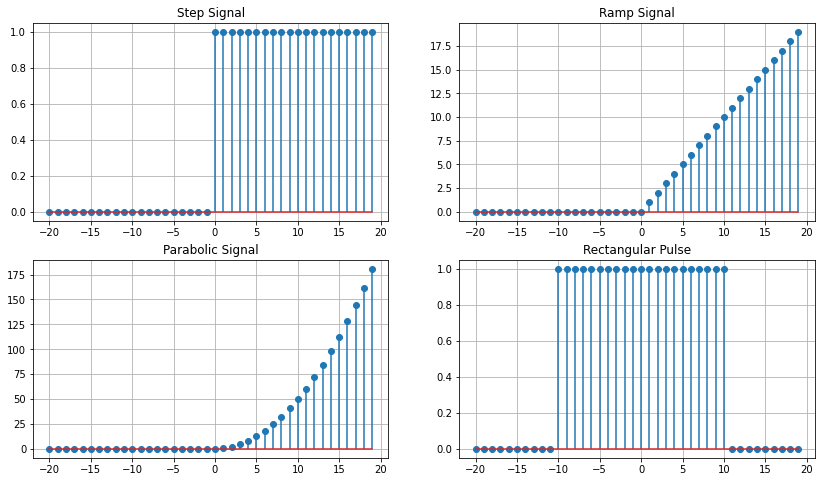

In [16]:
# Discrete time Step, Ramp, Parabolic and Rectangular signal

tn = np.arange(-20,20,1)
n = len(tn)

x1_n = zeros(n)  
x2_n = zeros(n)  
x3_n = zeros(n)  
x4_n = zeros(n)

for i in range(n):
    if tn[i] >= 0:
        x1_n[i] = 1                           # Step signal
        x2_n[i] = tn[i]*x1_n[i]               # Ramp signal
        x3_n[i] = 0.5*tn[i]*tn[i]*x1_n[i]     # Parabolic signal

# Rectangular Pulse
for i in range(n):
    if tn[i]>=-10 and tn[i]<=10:
        x4_n[i] = 1

plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
plt.stem(tn,x1_n)
plt.grid(True)
plt.title('Step Signal')

plt.subplot(2,2,2)
plt.stem(tn,x2_n)
plt.grid(True)
plt.title('Ramp Signal')

plt.subplot(2,2,3)
plt.stem(tn,x3_n)
plt.grid(True)
plt.title('Parabolic Signal')

plt.subplot(2,2,4)
plt.stem(tn,x4_n)
plt.grid(True)
plt.title('Rectangular Pulse')

plt.show()

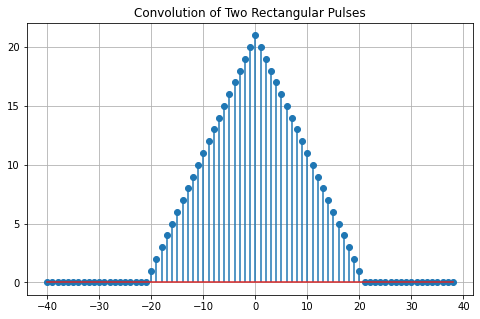

In [17]:
# Convolution of two discrete time rectangular pulses

x5_n = conv(x4_n,x4_n,n,n)
tn2 = np.arange(-40,39,1)

plt.figure(figsize=(8,5))
plt.stem(tn2,x5_n)
plt.grid(True)
plt.title('Convolution of Two Rectangular Pulses')
plt.show()

/var/folders/gv/jkt7wkln0mg5xdvnhld_ynxh0000gp/T/ipykernel_15813/2351505262.py:8: RuntimeWarning: invalid value encountered in double_scalars
  x6[i] = sin(tn3[i])/(tn3[i])


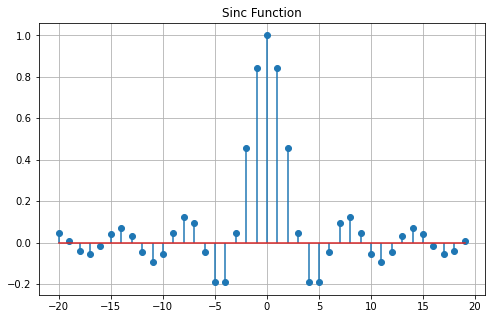

In [18]:
# Discrete Time Sinc function

x6 = zeros(40)
tn3 = np.arange(-20,20,1)
N = len(tn3)

for i in range(N):
    x6[i] = sin(tn3[i])/(tn3[i])

x6[20] = 1

plt.figure(figsize=(8,5))
plt.stem(tn3,x6)
plt.grid(True)
plt.title('Sinc Function')
plt.show()

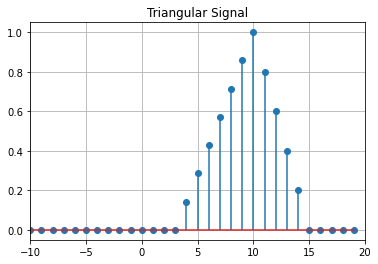

In [19]:
# Discrete Time Triangular Signal

tn = np.arange(-20,20,1)
n = len(tn)

x7 = zeros(n)

for i in range(n):
    if tn[i]<0:
        x7[i] = 0
    elif tn[i]>=3 and tn[i]<=10 :
        x7[i] = (tn[i]-3)/7
    elif tn[i]>=10 and tn[i]<=15:
        x7[i] = (15-tn[i])/5
    else:
        x7[i] = 0
        
plt.stem(tn,x7)
plt.xlim(-10,20)
plt.title('Triangular Signal')
plt.grid(True)

### In discrete-time domain, the impulse function, unit step function, ramp function, and parabolic function are related by the difference operation.
- Impulse function can be written as a difference of Step function and unity-delayed Step function.
- Step function can be written as a difference of Ramp function and unity-delayed Ramp function.
- Ramp function can be written as a difference of Parabolic function and unity-delayed Parabolic function.

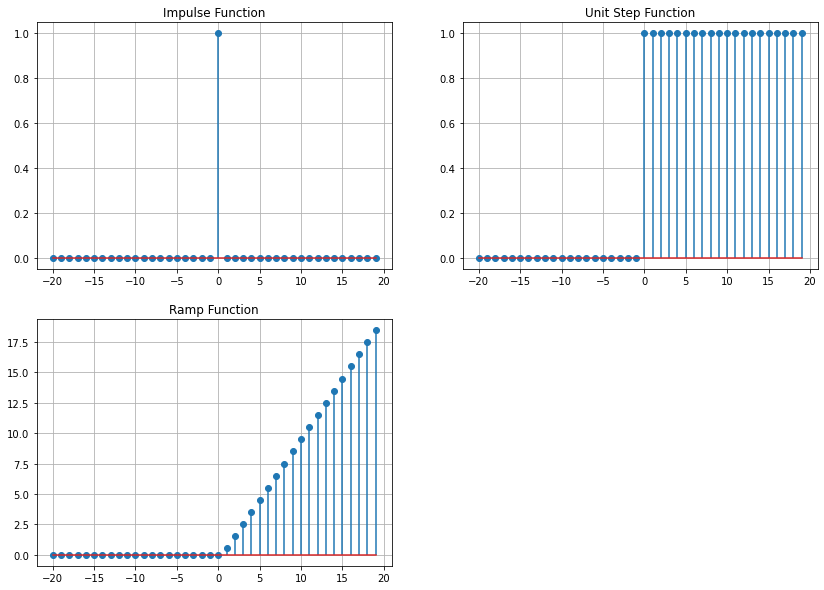

In [20]:
tn = np.arange(-20,20,1)
n = len(tn)

x1_n1 = zeros(n)
x2_n1 = zeros(n)
x3_n1 = zeros(n)

# Delaying the signals by unity
for i in range(n-1):
    x1_n1[i+1] = x1_n[i]
    x2_n1[i+1] = x2_n[i]
    x3_n1[i+1] = x3_n[i]
    
d_n = x1_n - x1_n1  # Impulse function as a difference of  Step function
u_n = x2_n - x2_n1  # Step function as a difference of Ramp function
u_n[20] = 1
r_n = x3_n - x3_n1  # Ramp function as a difference of Parabolic function

plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
plt.stem(tn,d_n)
plt.title('Impulse Function')
plt.grid(True)

plt.subplot(2,2,2)
plt.stem(tn,u_n)
plt.title('Unit Step Function')
plt.grid(True)

plt.subplot(2,2,3)
plt.stem(tn,r_n)
plt.title('Ramp Function')
plt.grid(True)

### Periodic Triangular Wave using Impulse Train

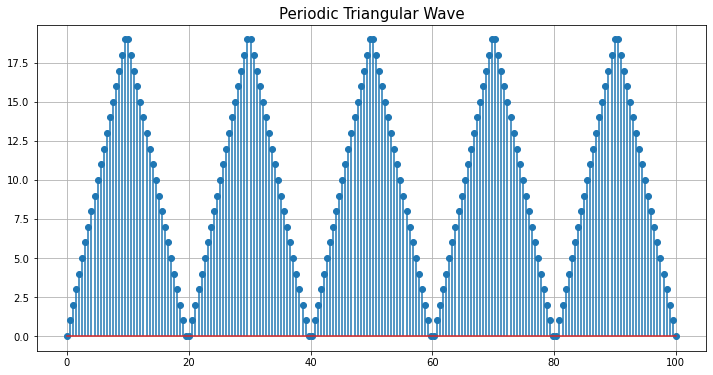

In [21]:
import numpy.matlib

t = np.arange(0,20,1)
N = len(t)

# Defining Impulse Train
imp_train = ones(N)

r1 = zeros(N)
r2 = zeros(N)
r3 = zeros(N+N)
tri = zeros(5*N)

# Computing Ramp Signal from Impulse train
for i in range(N):
    r1[i] = t[i]*imp_train[i]
    
for i in range(N):
    r2[i] = r1[N-i-1]

# Computing Traingular Pulse using ramp signal
for i in range(N+N):
    if i <N:
        r3[i] = r1[i]
    else:
        r3[i] = r2[i-N]
        
# Repeating the Triangular pulse 5 times
tri = np.matlib.repmat(r3, 1,5)
t1 = linspace(0,100,200)

plt.figure(figsize=(12,6))
plt.stem(t1,tri[0])
plt.title('Periodic Triangular Wave',size='15')
plt.grid(True)
plt.show()

## Linear Time Invariant (LTI) System

In [22]:
# Defining the Convolution function
def conv(x,h,N1,N2):
    y = [0] * (N1+N2-1)  # Declaring y as a zero array of length N1+N2-1
    for i in range(N1):
        for j in range(N2):
            y[i+j] += x[i]*h[j] 

    return y

# First Sequence
x1 = [3,5,2,6,8]
h1 = [-2,4,1]

n1 = [0,0,0,0,0]

N1=len(x1)
N2=len(h1)

y1 = conv(x1,h1,N1,N2)

print('Convolution: x1[n]*h1[n] gives following output\n ',y1)

# Second Sequence
x2 = [2,3,4,7,1]
h2 = [1,4,-2]

N1=len(x2)
N2=len(h2)

y2 = conv(x2,h2,N1,N2)

print('\nConvolution: x2[n]*h2[n] gives following output\n ',y2)

# plt.stem(n1,x1,'r',label='x[n]')
# plt.stem(h1,label='h[n]')
# plt.stem(y1,label='y[n]')
# plt.legend()


Convolution: x1[n]*h1[n] gives following output
  [-6, 2, 19, 1, 10, 38, 8]

Convolution: x2[n]*h2[n] gives following output
  [2, 11, 12, 17, 21, -10, -2]


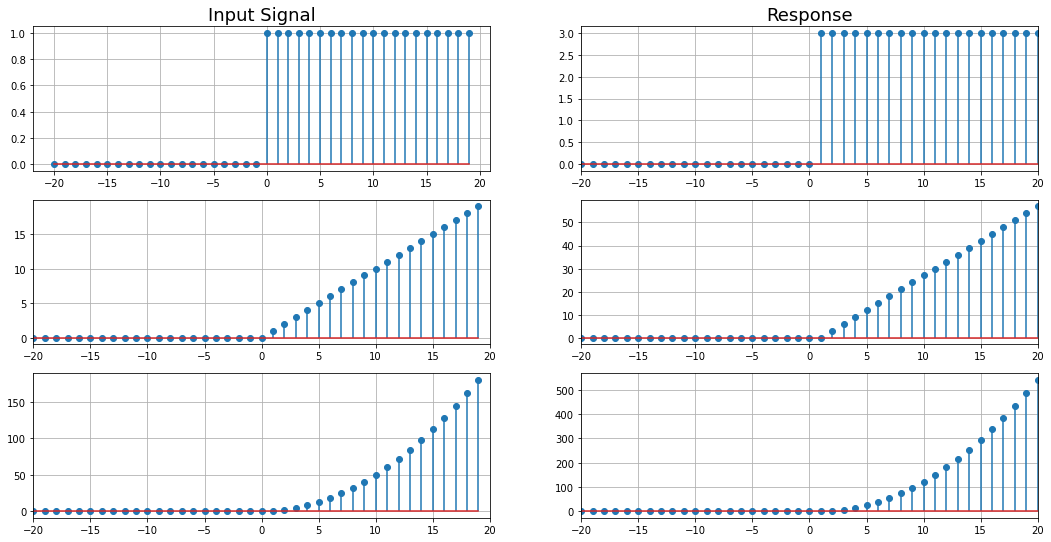

In [23]:
# Impulse response of the given system is 3*δ[n−1]

tn_x = np.arange(-20,20,1)
tn_y = np.arange(-40,39,1)

n = len(tn_x)
h_n = zeros(n)
N = len(h_n)

# Defining the Impulse Response
for i in range(n-1):
    h_n[i+1] = 3*d_n[i]

# Computing the respose for various inputs
y1 = conv(x1_n,h_n,n,N)
y2 = conv(x2_n,h_n,n,N)
y3 = conv(x3_n,h_n,n,N)

    
plt.figure(figsize=(18,25))

plt.subplot(8,2,1)
plt.stem(tn_x,x1_n)
plt.title('Input Signal',size=18)
plt.grid(True)

plt.subplot(8,2,2)
plt.stem(tn_y,y1)
plt.xlim(-20,20)
plt.title('Response',size=18)
plt.grid(True)

plt.subplot(8,2,3)
plt.stem(tn_x,x2_n)
plt.xlim(-20,20)
plt.grid(True)

plt.subplot(8,2,4)
plt.stem(tn_y,y2)
plt.xlim(-20,20)
plt.grid(True)

plt.subplot(8,2,5)
plt.stem(tn_x,x3_n)
plt.xlim(-20,20)
plt.grid(True)

plt.subplot(8,2,6)
plt.stem(tn_y,y3)
plt.xlim(-20,20)
plt.grid(True)

### Real and Imaginary part of the response for complex exponential input

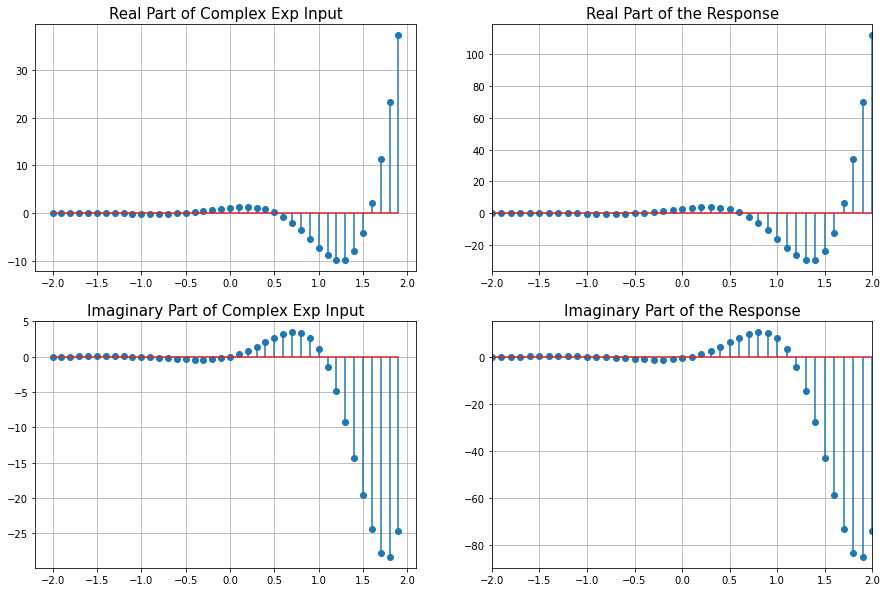

In [24]:
t1 = np.arange(-2,2,0.1)
t2 = np.arange(-4,3.9,0.1)
n1 = len(t1)
x4_Re = zeros(n1)
x4_Im = zeros(n1)

for i in range(n1):
    x4_Re[i] = np.cos(3*t1[i]) * np.exp(2*t1[i])
    x4_Im[i] = np.sin(3*t1[i]) * np.exp(2*t1[i]) 

y4_Re = conv(x4_Re,h_n,n1,N)
y4_Im = conv(x4_Im,h_n,n1,N)

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.stem(t1,x4_Re)
plt.title('Real Part of Complex Exp Input',size='15')
plt.grid(True)

plt.subplot(2,2,2)
plt.stem(t2,y4_Re)
plt.title('Real Part of the Response',size='15')
plt.xlim(-2,2)
plt.grid(True)

plt.subplot(2,2,3)
plt.stem(t1,x4_Im)
plt.title('Imaginary Part of Complex Exp Input',size='15')
plt.grid(True)

plt.subplot(2,2,4)
plt.stem(t2,y4_Im)
plt.title('Imaginary Part of the Response',size='15')
plt.xlim(-2,2)
plt.grid(True)

#### Consider an input x[n] and a unit impulse response h[n] given by x[n] = (1/3)^−n u[−n − 1] and h[n] = u[n − 1]. Determine and plot the output y[n] = x[n] ∗ h[n].

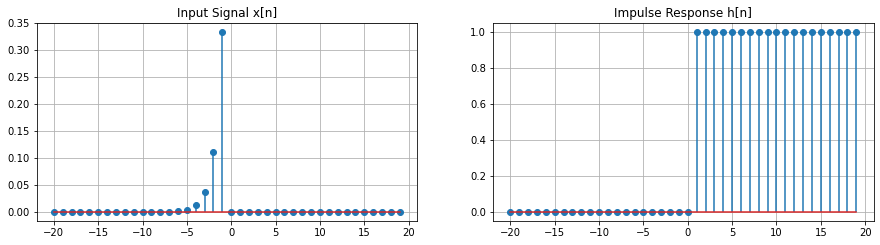

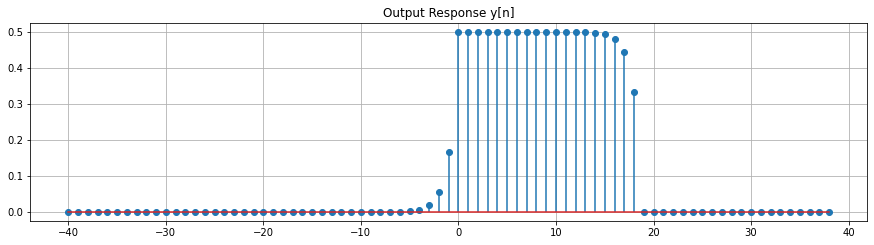

In [25]:
tn = np.arange(-20,20,1)
n = len(tn)

x = zeros(n)
h =zeros(n)

# Defining x[n]
for i in range(n):
    if tn[i] <=-1:
        x[i] = (1/3)**(-tn[i]) * 1

# Defining h[n]
for j in range(n):
    if tn[j] >=1:
        h[j] = 1
        
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.stem(tn,x)
plt.title('Input Signal x[n]')
plt.grid(True)

plt.subplot(2,2,2)
plt.stem(tn,h)
plt.title('Impulse Response h[n]')
plt.grid(True)

# Computing y[n] = x[n]*h[n]
y = conv(x,h,n,n)

tn1 = np.arange(-40,39,1)

plt.figure(figsize=(33,8))

plt.subplot(2,2,3)
plt.stem(tn1,y)
plt.title('Output Response y[n]')
plt.grid(True)

#### Consider the first-order difference equation: y[n]+2y[n−1] = x[n]. Assuming the condition of initial rest (i.e., if x[n] = 0 for n < n0, then y[n] = 0 for n < n0), find the impulse response of a system whose input and output are related by this difference equation.

### Impulse Response: h[n] = (-2)^n u[n]

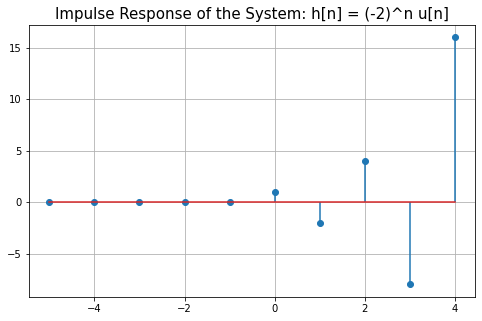

In [26]:
tn = np.arange(-5,5,1)
n = len(tn)
h = zeros(n)

# Defining the Impulse response
for i in range(n):
    if tn[i] >= 0:
        h[i] = (-2)**(tn[i])

plt.figure(figsize=(8,5))
plt.stem(tn,h)
plt.title('Impulse Response of the System: h[n] = (-2)^n u[n]', size='15')
plt.grid(True)
plt.show()

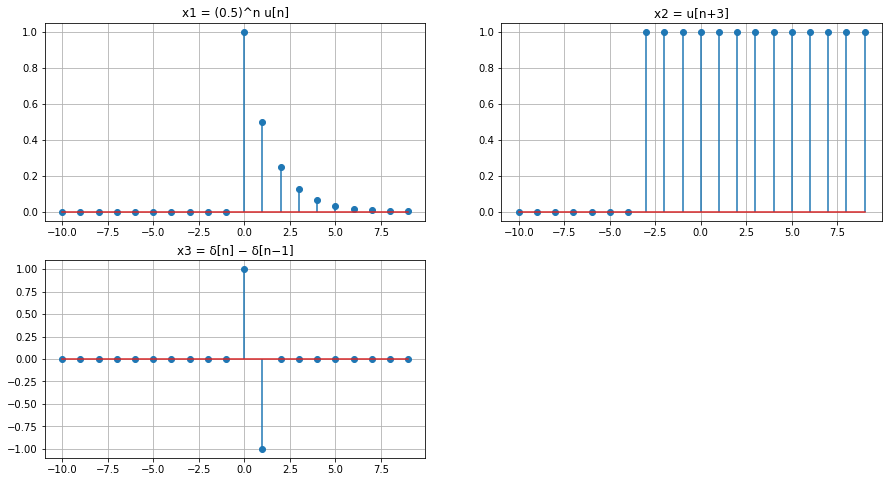

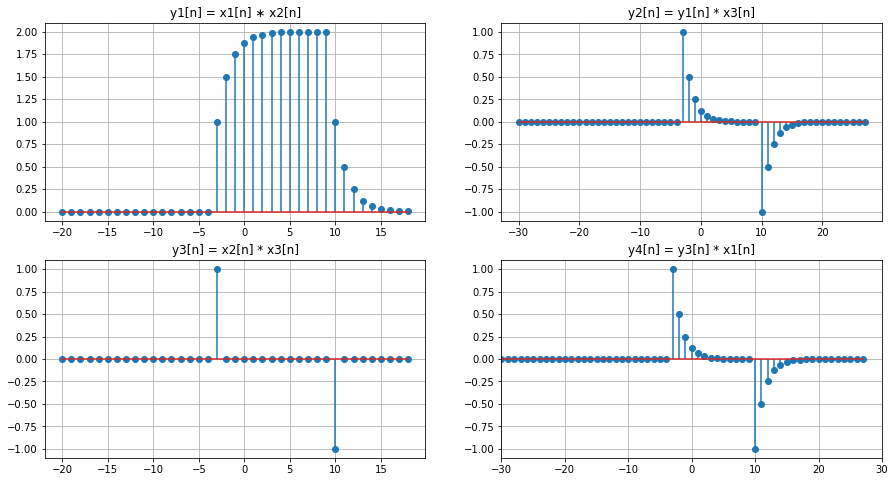

In [27]:
t = np.arange(-10,10,1)
n = len(t)

x1 = zeros(n)
x2 = zeros(n)
x3 = zeros(n)

# Defining x1[n], x2[n], x3[n]
for i in range(n):
    if t[i] >= 0:
        x1[i] = (0.5)**t[i]

for i in range(n):
    if t[i] >= -3:
        x2[i] = 1

for i in range(n):
    if t[i] == 0:
        x3[i] = 1
    
    elif t[i] == 1:
        x3[i] = -1
        
    else:
        x3[i] = 0

plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.stem(t,x1)
plt.title('x1 = (0.5)^n u[n]')
plt.grid(True)


plt.subplot(2,2,2)
plt.stem(t,x2)
plt.title('x2 = u[n+3]')
plt.grid(True)

plt.subplot(2,2,3)
plt.stem(t,x3)
plt.title('x3 = δ[n] − δ[n−1]')
plt.grid(True)

# Computing y1[n], y2[n], y3[n] and y4[n]
y1 = conv(x1,x2,n,n)
y2 = conv(y1,x3,2*n-1,n)
y3 = conv(x2,x3,n,n)
y4 = conv(y3,x1,2*n-1,n)

t1 = np.arange(-20,19,1)
t2 = np.arange(-30,28,1)
t4 = np.arange(-40,37,1)

plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.stem(t1,y1)
plt.title('y1[n] = x1[n] ∗ x2[n]')
plt.grid(True)

plt.subplot(2,2,2)
plt.stem(t2,y2)
plt.title('y2[n] = y1[n] * x3[n]')
plt.grid(True)

plt.subplot(2,2,3)
plt.stem(t1,y3)
plt.title('y3[n] = x2[n] * x3[n]')
plt.grid(True)

plt.subplot(2,2,4)
plt.stem(t2,y4)
plt.xlim(-30,30)
plt.title('y4[n] = y3[n] * x1[n]')
plt.grid(True)